Natural language processing (NLP) involves the observation and manipulation of text strings, including but not limited to: transforming orthographies, tagging things within a text (such as parts of speech, syntax, proper nouns), counting things (e.g., word frequencies), and segmenting (dividing a text by sentences or by words). We'll cover a few of these here.

# Segmenting text by sentence

Latin orthography uses a few characters for sentence-final punctuation (".", "?", "!"). However, problems arise because "." may also be used in non-sentence-final situations (most frequently praenomina – "M. Tullius Cicero", "Cn. Pompeius Magnus" and the like).

For Greek texts, similar challenges arise with periods (usually in the form of ellipses "...") being used as an editorial convention for missing characters or words.

In [1]:
# Let's start by binding a text string to a variable

# Introduction to Cato's De agricultura
cato_agri_praef = "Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum. Maiores nostri sic habuerunt et ita in legibus posiverunt: furem dupli condemnari, foeneratorem quadrupli. Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare. Et virum bonum quom laudabant, ita laudabant: bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur. Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum. At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt. Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit."

In [2]:
print(cato_agri_praef)

Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum. Maiores nostri sic habuerunt et ita in legibus posiverunt: furem dupli condemnari, foeneratorem quadrupli. Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare. Et virum bonum quom laudabant, ita laudabant: bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur. Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum. At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt. Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.


In [3]:
# See http://docs.cltk.org/en/latest/latin.html#sentence-tokenization

from cltk.tokenize.sentence import TokenizeSentence

In [4]:
tokenizer = TokenizeSentence('latin')

In [5]:
cato_sentence_tokens = tokenizer.tokenize_sentences(cato_agri_praef)

In [6]:
print(cato_sentence_tokens)

['Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum.', 'Maiores nostri sic habuerunt et ita in legibus posiverunt:', 'furem dupli condemnari, foeneratorem quadrupli.', 'Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare.', 'Et virum bonum quom laudabant, ita laudabant:', 'bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur.', 'Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum.', 'At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt.', 'Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.']


In [7]:
# This has correctly identified 9 sentences
print(len(cato_sentence_tokens))

9


In [8]:
# Another view
for sentence in cato_sentence_tokens:
    print(sentence)
    print()

Est interdum praestare mercaturis rem quaerere, nisi tam periculosum sit, et item foenerari, si tam honestum.

Maiores nostri sic habuerunt et ita in legibus posiverunt:

furem dupli condemnari, foeneratorem quadrupli.

Quanto peiorem civem existimarint foeneratorem quam furem, hinc licet existimare.

Et virum bonum quom laudabant, ita laudabant:

bonum agricolam bonumque colonum; amplissime laudari existimabatur qui ita laudabatur.

Mercatorem autem strenuum studiosumque rei quaerendae existimo, verum, ut supra dixi, periculosum et calamitosum.

At ex agricolis et viri fortissimi et milites strenuissimi gignuntur, maximeque pius quaestus stabilissimusque consequitur minimeque invidiosus, minimeque male cogitantes sunt qui in eo studio occupati sunt.

Nunc, ut ad rem redeam, quod promisi institutum principium hoc erit.



## It works in Greek too

Let's revise now, applying the same methods to a Greek text.

In [9]:
# Incipit of Athenaeus' Deipnosophistae (I.1)
athenaeus_incipit = "Ἀθήναιος μὲν ὁ τῆς βίβλου πατήρ· ποιεῖται δὲ τὸν λόγον πρὸς Τιμοκράτην· Δειπνοσοφιστὴς δὲ ταύτῃ τὸ ὄνομα. Ὑπόκειται δὲ τῷ λόγῳ Λαρήνσιος Ῥωμαῖος, ἀνὴρ τῇ τύχῃ περιφανής, τοὺς κατὰ πᾶσαν παιδείαν ἐμπειροτάτους ἐν αὑτοῦ δαιτυμόνας ποιούμενος· ἐν οἷς οὐκ ἔσθ᾽ οὗτινος τῶν καλλίστων οὐκ ἐμνημόνευσεν. Ἰχθῦς τε γὰρ τῇ βίβλῳ ἐνέθετο καὶ τὰς τούτων χρείας καὶ τὰς τῶν ὀνομάτων ἀναπτύξεις καὶ λαχάνων γένη παντοῖα καὶ ζῴων παντοδαπῶν καὶ ἄνδρας ἱστορίας συγγεγραφότας καὶ ποιητὰς καὶ φιλοσόφους καὶ ὄργανα μουσικὰ καὶ σκωμμάτων εἴδη μυρία καὶ ἐκπωμάτων διαφορὰς καὶ πλούτους βασιλέων διηγήσατο καὶ νηῶν μεγέθη καὶ ὅσα ἄλλα οὐδ᾽ ἂν εὐχερῶς ἀπομνημονεύσαιμι, ἢ ἐπιλίποι μ᾽ ἂν ἡ ἡμέρα κατ᾽ εἶδος διεξερχόμενον. Καί ἐστιν ἡ τοῦ λόγου οἰκονομία μίμημα τῆς τοῦ δείπνου πολυτελείας καὶ ἡ τῆς βίβλου διασκευὴ τῆς ἐν τῷ δείπνῳ παρασκευῆς. Τοιοῦτον ὁ θαυμαστὸς οὗτος τοῦ λόγου οἰκονόμος Ἀθήναιος ἥδιστον λογόδειπνον εἰσηγεῖται κρείττων τε αὐτὸς ἑαυτοῦ γινόμενος, ὥσπερ οἱ Ἀθήνησι ῥήτορες, ὑπὸ τῆς ἐν τῷ λέγειν θερμότητος πρὸς τὰ ἑπόμενα τῆς βίβλου βαθμηδὸν ὑπεράλλεται."

In [10]:
print(athenaeus_incipit)

Ἀθήναιος μὲν ὁ τῆς βίβλου πατήρ· ποιεῖται δὲ τὸν λόγον πρὸς Τιμοκράτην· Δειπνοσοφιστὴς δὲ ταύτῃ τὸ ὄνομα. Ὑπόκειται δὲ τῷ λόγῳ Λαρήνσιος Ῥωμαῖος, ἀνὴρ τῇ τύχῃ περιφανής, τοὺς κατὰ πᾶσαν παιδείαν ἐμπειροτάτους ἐν αὑτοῦ δαιτυμόνας ποιούμενος· ἐν οἷς οὐκ ἔσθ᾽ οὗτινος τῶν καλλίστων οὐκ ἐμνημόνευσεν. Ἰχθῦς τε γὰρ τῇ βίβλῳ ἐνέθετο καὶ τὰς τούτων χρείας καὶ τὰς τῶν ὀνομάτων ἀναπτύξεις καὶ λαχάνων γένη παντοῖα καὶ ζῴων παντοδαπῶν καὶ ἄνδρας ἱστορίας συγγεγραφότας καὶ ποιητὰς καὶ φιλοσόφους καὶ ὄργανα μουσικὰ καὶ σκωμμάτων εἴδη μυρία καὶ ἐκπωμάτων διαφορὰς καὶ πλούτους βασιλέων διηγήσατο καὶ νηῶν μεγέθη καὶ ὅσα ἄλλα οὐδ᾽ ἂν εὐχερῶς ἀπομνημονεύσαιμι, ἢ ἐπιλίποι μ᾽ ἂν ἡ ἡμέρα κατ᾽ εἶδος διεξερχόμενον. Καί ἐστιν ἡ τοῦ λόγου οἰκονομία μίμημα τῆς τοῦ δείπνου πολυτελείας καὶ ἡ τῆς βίβλου διασκευὴ τῆς ἐν τῷ δείπνῳ παρασκευῆς. Τοιοῦτον ὁ θαυμαστὸς οὗτος τοῦ λόγου οἰκονόμος Ἀθήναιος ἥδιστον λογόδειπνον εἰσηγεῖται κρείττων τε αὐτὸς ἑαυτοῦ γινόμενος, ὥσπερ οἱ Ἀθήνησι ῥήτορες, ὑπὸ τῆς ἐν τῷ λέγειν θερμότητ

In [11]:
from cltk.tokenize.sentence import TokenizeSentence
tokenizer = TokenizeSentence('greek')

athenaeus_sentence_tokens = tokenizer.tokenize_sentences(athenaeus_incipit)

In [12]:
print(athenaeus_sentence_tokens)

['Ἀθήναιος μὲν ὁ τῆς βίβλου πατήρ· ποιεῖται δὲ τὸν λόγον πρὸς Τιμοκράτην· Δειπνοσοφιστὴς δὲ ταύτῃ τὸ ὄνομα.', 'Ὑπόκειται δὲ τῷ λόγῳ Λαρήνσιος Ῥωμαῖος, ἀνὴρ τῇ τύχῃ περιφανής, τοὺς κατὰ πᾶσαν παιδείαν ἐμπειροτάτους ἐν αὑτοῦ δαιτυμόνας ποιούμενος· ἐν οἷς οὐκ ἔσθ᾽ οὗτινος τῶν καλλίστων οὐκ ἐμνημόνευσεν.', 'Ἰχθῦς τε γὰρ τῇ βίβλῳ ἐνέθετο καὶ τὰς τούτων χρείας καὶ τὰς τῶν ὀνομάτων ἀναπτύξεις καὶ λαχάνων γένη παντοῖα καὶ ζῴων παντοδαπῶν καὶ ἄνδρας ἱστορίας συγγεγραφότας καὶ ποιητὰς καὶ φιλοσόφους καὶ ὄργανα μουσικὰ καὶ σκωμμάτων εἴδη μυρία καὶ ἐκπωμάτων διαφορὰς καὶ πλούτους βασιλέων διηγήσατο καὶ νηῶν μεγέθη καὶ ὅσα ἄλλα οὐδ᾽ ἂν εὐχερῶς ἀπομνημονεύσαιμι, ἢ ἐπιλίποι μ᾽ ἂν ἡ ἡμέρα κατ᾽ εἶδος διεξερχόμενον.', 'Καί ἐστιν ἡ τοῦ λόγου οἰκονομία μίμημα τῆς τοῦ δείπνου πολυτελείας καὶ ἡ τῆς βίβλου διασκευὴ τῆς ἐν τῷ δείπνῳ παρασκευῆς.', 'Τοιοῦτον ὁ θαυμαστὸς οὗτος τοῦ λόγου οἰκονόμος Ἀθήναιος ἥδιστον λογόδειπνον εἰσηγεῖται κρείττων τε αὐτὸς ἑαυτοῦ γινόμενος, ὥσπερ οἱ Ἀθήνησι ῥήτορες, ὑπὸ τῆς ἐν τῷ λ

In [13]:
print(len(athenaeus_sentence_tokens))

5


In [14]:
for sentence in athenaeus_sentence_tokens:
    print("*", sentence)

* Ἀθήναιος μὲν ὁ τῆς βίβλου πατήρ· ποιεῖται δὲ τὸν λόγον πρὸς Τιμοκράτην· Δειπνοσοφιστὴς δὲ ταύτῃ τὸ ὄνομα.
* Ὑπόκειται δὲ τῷ λόγῳ Λαρήνσιος Ῥωμαῖος, ἀνὴρ τῇ τύχῃ περιφανής, τοὺς κατὰ πᾶσαν παιδείαν ἐμπειροτάτους ἐν αὑτοῦ δαιτυμόνας ποιούμενος· ἐν οἷς οὐκ ἔσθ᾽ οὗτινος τῶν καλλίστων οὐκ ἐμνημόνευσεν.
* Ἰχθῦς τε γὰρ τῇ βίβλῳ ἐνέθετο καὶ τὰς τούτων χρείας καὶ τὰς τῶν ὀνομάτων ἀναπτύξεις καὶ λαχάνων γένη παντοῖα καὶ ζῴων παντοδαπῶν καὶ ἄνδρας ἱστορίας συγγεγραφότας καὶ ποιητὰς καὶ φιλοσόφους καὶ ὄργανα μουσικὰ καὶ σκωμμάτων εἴδη μυρία καὶ ἐκπωμάτων διαφορὰς καὶ πλούτους βασιλέων διηγήσατο καὶ νηῶν μεγέθη καὶ ὅσα ἄλλα οὐδ᾽ ἂν εὐχερῶς ἀπομνημονεύσαιμι, ἢ ἐπιλίποι μ᾽ ἂν ἡ ἡμέρα κατ᾽ εἶδος διεξερχόμενον.
* Καί ἐστιν ἡ τοῦ λόγου οἰκονομία μίμημα τῆς τοῦ δείπνου πολυτελείας καὶ ἡ τῆς βίβλου διασκευὴ τῆς ἐν τῷ δείπνῳ παρασκευῆς.
* Τοιοῦτον ὁ θαυμαστὸς οὗτος τοῦ λόγου οἰκονόμος Ἀθήναιος ἥδιστον λογόδειπνον εἰσηγεῖται κρείττων τε αὐτὸς ἑαυτοῦ γινόμενος, ὥσπερ οἱ Ἀθήνησι ῥήτορες, ὑπὸ τῆς ἐν τῷ λέγει

# Tokenize words

The CLTK offers several ways to segment word tokens, that is to automatically detect word boundaries. For most languages, a simple whitespace or punctation token suffices, however there are important edge cases.

For general tokenization, one of the methods here will likely work: <http://docs.cltk.org/en/latest/multilingual.html#word-tokenization>.

For the Latin language, we have a special word tokenizer which separates enclitics such as "-que" and "-ve".

In [15]:
# Import general-use word tokenizer

from cltk.tokenize.word import nltk_tokenize_words

In [16]:
cato_word_tokens = nltk_tokenize_words(cato_agri_praef)

In [17]:
print(cato_word_tokens)

['Est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', ',', 'nisi', 'tam', 'periculosum', 'sit', ',', 'et', 'item', 'foenerari', ',', 'si', 'tam', 'honestum', '.', 'Maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', ':', 'furem', 'dupli', 'condemnari', ',', 'foeneratorem', 'quadrupli', '.', 'Quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', ',', 'hinc', 'licet', 'existimare', '.', 'Et', 'virum', 'bonum', 'quom', 'laudabant', ',', 'ita', 'laudabant', ':', 'bonum', 'agricolam', 'bonumque', 'colonum', ';', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', '.', 'Mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', ',', 'verum', ',', 'ut', 'supra', 'dixi', ',', 'periculosum', 'et', 'calamitosum', '.', 'At', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', ',', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 

Notice that punctuation is divided here and thus counted as word. One way to remove these is to use a list comprehension:

In [18]:
cato_word_tokens_no_punt = [token for token in cato_word_tokens if token not in ['.', ',', ':', ';']]

In [19]:
print(cato_word_tokens_no_punt)

['Est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'nisi', 'tam', 'periculosum', 'sit', 'et', 'item', 'foenerari', 'si', 'tam', 'honestum', 'Maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'Quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', 'hinc', 'licet', 'existimare', 'Et', 'virum', 'bonum', 'quom', 'laudabant', 'ita', 'laudabant', 'bonum', 'agricolam', 'bonumque', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', 'Mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', 'verum', 'ut', 'supra', 'dixi', 'periculosum', 'et', 'calamitosum', 'At', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 'minimeque', 'invidiosus', 'minimeque', 'male', 'cogitantes', 'sunt', 'qui', 'in', 'eo', '

In [20]:
# Count words

print(len(cato_word_tokens_no_punt))

109


In [21]:
# The set() function removes duplicates from a list
# Let's see how many unique words are in here

cato_word_tokens_no_punt_unique = set(cato_word_tokens_no_punt)
print(cato_word_tokens_no_punt_unique)

{'honestum', 'foenerari', 'fortissimi', 'existimare', 'ad', 'civem', 'bonumque', 'Et', 'gignuntur', 'dupli', 'promisi', 'quaestus', 'erit', 'agricolam', 'mercaturis', 'consequitur', 'licet', 'ita', 'laudabatur', 'praestare', 'amplissime', 'laudari', 'foeneratorem', 'eo', 'redeam', 'tam', 'At', 'interdum', 'periculosum', 'Quanto', 'hoc', 'posiverunt', 'sunt', 'supra', 'existimabatur', 'cogitantes', 'viri', 'habuerunt', 'milites', 'Est', 'existimo', 'studio', 'institutum', 'laudabant', 'qui', 'Mercatorem', 'maximeque', 'colonum', 'item', 'principium', 'nostri', 'et', 'condemnari', 'studiosumque', 'sic', 'occupati', 'nisi', 'rei', 'stabilissimusque', 'bonum', 'male', 'dixi', 'calamitosum', 'strenuissimi', 'minimeque', 'legibus', 'virum', 'Maiores', 'quom', 'autem', 'ex', 'quaerere', 'hinc', 'Nunc', 'pius', 'ut', 'si', 'rem', 'existimarint', 'in', 'strenuum', 'quod', 'invidiosus', 'agricolis', 'quam', 'sit', 'peiorem', 'quaerendae', 'verum', 'furem', 'quadrupli'}


In [22]:
print(len(cato_word_tokens_no_punt_unique))

91


In [23]:
# There's a mistake here, though:
# capitalized words ('At', 'Est', 'Nunc') would be counted incorrectly.
# So let's lowercase the input string and try again:

cato_agri_praef_lowered = cato_agri_praef.lower()
cato_word_tokens_lowered = nltk_tokenize_words(cato_agri_praef_lowered)

In [24]:
# Check that we have a lowercase text

print(cato_word_tokens_lowered)

['est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', ',', 'nisi', 'tam', 'periculosum', 'sit', ',', 'et', 'item', 'foenerari', ',', 'si', 'tam', 'honestum', '.', 'maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', ':', 'furem', 'dupli', 'condemnari', ',', 'foeneratorem', 'quadrupli', '.', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', ',', 'hinc', 'licet', 'existimare', '.', 'et', 'virum', 'bonum', 'quom', 'laudabant', ',', 'ita', 'laudabant', ':', 'bonum', 'agricolam', 'bonumque', 'colonum', ';', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', '.', 'mercatorem', 'autem', 'strenuum', 'studiosumque', 'rei', 'quaerendae', 'existimo', ',', 'verum', ',', 'ut', 'supra', 'dixi', ',', 'periculosum', 'et', 'calamitosum', '.', 'at', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', ',', 'maximeque', 'pius', 'quaestus', 'stabilissimusque', 'consequitur', 

In [25]:
# Now let's do everything again:

cato_word_tokens_no_punt_lowered = [token for token in cato_word_tokens_lowered if token not in ['.', ',', ':', ';']]
cato_word_tokens_no_punt_unique_lowered = set(cato_word_tokens_no_punt_lowered)
print(len(cato_word_tokens_no_punt_unique_lowered))

90


Observe that this corrected count has one unique word less.

## Tokenizing words with the CLTK Latin tokenizer

We have a tokenizer which removes enclitics and counts them as separate words. For example, we have the word "minimeque" which ought to become "minime" and "que".

In [26]:
from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')
cato_cltk_word_tokens = word_tokenizer.tokenize(cato_agri_praef_lowered)
cato_cltk_word_tokens_no_punt = [token for token in cato_cltk_word_tokens if token not in ['.', ',', ':', ';']]

print(cato_cltk_word_tokens_no_punt)

# Now you can see the word "-que":

['est', 'interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'nisi', 'tam', 'periculosum', 'sit', 'et', 'item', 'foenerari', 'si', 'tam', 'honestum', 'maiores', 'nostri', 'sic', 'habuerunt', 'et', 'ita', 'in', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'quam', 'furem', 'hinc', 'licet', 'existimare', 'et', 'virum', 'bonum', 'quom', 'laudabant', 'ita', 'laudabant', 'bonum', 'agricolam', 'bonum', '-que', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'qui', 'ita', 'laudabatur', 'mercatorem', 'autem', 'strenuum', 'studiosum', '-que', 'rei', 'quaerendae', 'existimo', 'verum', 'ut', 'supra', 'dixi', 'periculosum', 'et', 'calamitosum', 'at', 'ex', 'agricolis', 'et', 'viri', 'fortissimi', 'et', 'milites', 'strenuissimi', 'gignuntur', 'maxime', '-que', 'pius', 'quaestus', 'stabilissimus', '-que', 'consequitur', 'minime', '-que', 'invidiosus', 'minime', '-que', 'male', 'cogitantes'

In [27]:
# There are more words

print(len(cato_cltk_word_tokens_no_punt))  # was 109

115


In [28]:
# The list of unique words is more accurate.

cato_cltk_word_tokens_no_punt_unique = set(cato_cltk_word_tokens_no_punt)
print(len(cato_cltk_word_tokens_no_punt_unique))  # balances out to be the same (90)

90


In [29]:
# Using .difference() is an easy way to compare two sets

cato_cltk_word_tokens_no_punt_unique.difference(cato_word_tokens_no_punt_unique_lowered)

{'-que', 'maxime', 'minime', 'stabilissimus', 'studiosum'}

## Now for some Greek

In [30]:
from cltk.tokenize.word import nltk_tokenize_words
athenaeus_word_tokens = nltk_tokenize_words(athenaeus_incipit)
print(athenaeus_word_tokens)

['Ἀθήναιος', 'μὲν', 'ὁ', 'τῆς', 'βίβλου', 'πατήρ·', 'ποιεῖται', 'δὲ', 'τὸν', 'λόγον', 'πρὸς', 'Τιμοκράτην·', 'Δειπνοσοφιστὴς', 'δὲ', 'ταύτῃ', 'τὸ', 'ὄνομα', '.', 'Ὑπόκειται', 'δὲ', 'τῷ', 'λόγῳ', 'Λαρήνσιος', 'Ῥωμαῖος', ',', 'ἀνὴρ', 'τῇ', 'τύχῃ', 'περιφανής', ',', 'τοὺς', 'κατὰ', 'πᾶσαν', 'παιδείαν', 'ἐμπειροτάτους', 'ἐν', 'αὑτοῦ', 'δαιτυμόνας', 'ποιούμενος·', 'ἐν', 'οἷς', 'οὐκ', 'ἔσθ᾽', 'οὗτινος', 'τῶν', 'καλλίστων', 'οὐκ', 'ἐμνημόνευσεν', '.', 'Ἰχθῦς', 'τε', 'γὰρ', 'τῇ', 'βίβλῳ', 'ἐνέθετο', 'καὶ', 'τὰς', 'τούτων', 'χρείας', 'καὶ', 'τὰς', 'τῶν', 'ὀνομάτων', 'ἀναπτύξεις', 'καὶ', 'λαχάνων', 'γένη', 'παντοῖα', 'καὶ', 'ζῴων', 'παντοδαπῶν', 'καὶ', 'ἄνδρας', 'ἱστορίας', 'συγγεγραφότας', 'καὶ', 'ποιητὰς', 'καὶ', 'φιλοσόφους', 'καὶ', 'ὄργανα', 'μουσικὰ', 'καὶ', 'σκωμμάτων', 'εἴδη', 'μυρία', 'καὶ', 'ἐκπωμάτων', 'διαφορὰς', 'καὶ', 'πλούτους', 'βασιλέων', 'διηγήσατο', 'καὶ', 'νηῶν', 'μεγέθη', 'καὶ', 'ὅσα', 'ἄλλα', 'οὐδ᾽', 'ἂν', 'εὐχερῶς', 'ἀπομνημονεύσαιμι', ',', 'ἢ', 'ἐπιλίποι', 'μ᾽', 'ἂν', 'ἡ',

In [31]:
athenaeus_word_tokens_no_punt = [token for token in athenaeus_word_tokens if token not in ['.', ',', ':', ';']]
print(athenaeus_word_tokens_no_punt)

['Ἀθήναιος', 'μὲν', 'ὁ', 'τῆς', 'βίβλου', 'πατήρ·', 'ποιεῖται', 'δὲ', 'τὸν', 'λόγον', 'πρὸς', 'Τιμοκράτην·', 'Δειπνοσοφιστὴς', 'δὲ', 'ταύτῃ', 'τὸ', 'ὄνομα', 'Ὑπόκειται', 'δὲ', 'τῷ', 'λόγῳ', 'Λαρήνσιος', 'Ῥωμαῖος', 'ἀνὴρ', 'τῇ', 'τύχῃ', 'περιφανής', 'τοὺς', 'κατὰ', 'πᾶσαν', 'παιδείαν', 'ἐμπειροτάτους', 'ἐν', 'αὑτοῦ', 'δαιτυμόνας', 'ποιούμενος·', 'ἐν', 'οἷς', 'οὐκ', 'ἔσθ᾽', 'οὗτινος', 'τῶν', 'καλλίστων', 'οὐκ', 'ἐμνημόνευσεν', 'Ἰχθῦς', 'τε', 'γὰρ', 'τῇ', 'βίβλῳ', 'ἐνέθετο', 'καὶ', 'τὰς', 'τούτων', 'χρείας', 'καὶ', 'τὰς', 'τῶν', 'ὀνομάτων', 'ἀναπτύξεις', 'καὶ', 'λαχάνων', 'γένη', 'παντοῖα', 'καὶ', 'ζῴων', 'παντοδαπῶν', 'καὶ', 'ἄνδρας', 'ἱστορίας', 'συγγεγραφότας', 'καὶ', 'ποιητὰς', 'καὶ', 'φιλοσόφους', 'καὶ', 'ὄργανα', 'μουσικὰ', 'καὶ', 'σκωμμάτων', 'εἴδη', 'μυρία', 'καὶ', 'ἐκπωμάτων', 'διαφορὰς', 'καὶ', 'πλούτους', 'βασιλέων', 'διηγήσατο', 'καὶ', 'νηῶν', 'μεγέθη', 'καὶ', 'ὅσα', 'ἄλλα', 'οὐδ᾽', 'ἂν', 'εὐχερῶς', 'ἀπομνημονεύσαιμι', 'ἢ', 'ἐπιλίποι', 'μ᾽', 'ἂν', 'ἡ', 'ἡμέρα', 'κατ᾽', 'εἶδος'

In [32]:
print(len(athenaeus_word_tokens_no_punt))

162


In [33]:
athenaeus_word_tokens_no_punt_unique = set(athenaeus_word_tokens_no_punt)
print(athenaeus_word_tokens_no_punt_unique)

{'ὀνομάτων', 'δαιτυμόνας', 'οἷς', 'λέγειν', 'οὐκ', 'τε', 'διασκευὴ', 'ἂν', 'ἱστορίας', 'βασιλέων', 'τῇ', 'γινόμενος', 'διηγήσατο', 'λογόδειπνον', 'ποιεῖται', 'φιλοσόφους', 'τὰς', 'εἶδος', 'ἐμνημόνευσεν', 'ἐνέθετο', 'ζῴων', 'Λαρήνσιος', 'ἀναπτύξεις', 'λαχάνων', 'μεγέθη', 'Ἰχθῦς', 'ποιητὰς', 'ὅσα', 'πολυτελείας', 'εὐχερῶς', 'μουσικὰ', 'αὑτοῦ', 'βίβλου', 'κατ᾽', 'τοῦ', 'καὶ', 'παρασκευῆς', 'θαυμαστὸς', 'πρὸς', 'δείπνῳ', 'οἱ', 'τῆς', 'παιδείαν', 'ἀπομνημονεύσαιμι', 'μὲν', 'πλούτους', 'ἡμέρα', 'οὗτινος', 'ταύτῃ', 'περιφανής', 'διαφορὰς', 'τὸν', 'Τοιοῦτον', 'ὄργανα', 'δὲ', 'Ῥωμαῖος', 'οἰκονόμος', 'αὐτὸς', 'ἡ', 'λόγον', 'τοὺς', 'ἐπιλίποι', 'λόγου', 'ἄλλα', 'ἐστιν', 'πατήρ·', 'τῶν', 'ἔσθ᾽', 'Καί', 'ἑπόμενα', 'μίμημα', 'ἢ', 'Ἀθήναιος', 'ῥήτορες', 'γένη', 'διεξερχόμενον', 'λόγῳ', 'καλλίστων', 'συγγεγραφότας', 'ποιούμενος·', 'Ἀθήνησι', 'βίβλῳ', 'σκωμμάτων', 'τῷ', 'ἑαυτοῦ', 'ὁ', 'ἐκπωμάτων', 'τὰ', 'εἴδη', 'τὸ', 'οἰκονομία', 'ὑπεράλλεται', 'Δειπνοσοφιστὴς', 'γὰρ', 'ὑπὸ', 'χρείας', 'ὥσπερ', 'οὐδ᾽', 

In [34]:
print(len(athenaeus_word_tokens_no_punt_unique))

121


In [35]:
athenaeus_incipit_lowered = athenaeus_incipit.lower()
athenaeus_word_tokens_lowered = nltk_tokenize_words(athenaeus_incipit_lowered)
print(athenaeus_word_tokens_lowered)

['ἀθήναιος', 'μὲν', 'ὁ', 'τῆς', 'βίβλου', 'πατήρ·', 'ποιεῖται', 'δὲ', 'τὸν', 'λόγον', 'πρὸς', 'τιμοκράτην·', 'δειπνοσοφιστὴς', 'δὲ', 'ταύτῃ', 'τὸ', 'ὄνομα', '.', 'ὑπόκειται', 'δὲ', 'τῷ', 'λόγῳ', 'λαρήνσιος', 'ῥωμαῖος', ',', 'ἀνὴρ', 'τῇ', 'τύχῃ', 'περιφανής', ',', 'τοὺς', 'κατὰ', 'πᾶσαν', 'παιδείαν', 'ἐμπειροτάτους', 'ἐν', 'αὑτοῦ', 'δαιτυμόνας', 'ποιούμενος·', 'ἐν', 'οἷς', 'οὐκ', 'ἔσθ᾽', 'οὗτινος', 'τῶν', 'καλλίστων', 'οὐκ', 'ἐμνημόνευσεν', '.', 'ἰχθῦς', 'τε', 'γὰρ', 'τῇ', 'βίβλῳ', 'ἐνέθετο', 'καὶ', 'τὰς', 'τούτων', 'χρείας', 'καὶ', 'τὰς', 'τῶν', 'ὀνομάτων', 'ἀναπτύξεις', 'καὶ', 'λαχάνων', 'γένη', 'παντοῖα', 'καὶ', 'ζῴων', 'παντοδαπῶν', 'καὶ', 'ἄνδρας', 'ἱστορίας', 'συγγεγραφότας', 'καὶ', 'ποιητὰς', 'καὶ', 'φιλοσόφους', 'καὶ', 'ὄργανα', 'μουσικὰ', 'καὶ', 'σκωμμάτων', 'εἴδη', 'μυρία', 'καὶ', 'ἐκπωμάτων', 'διαφορὰς', 'καὶ', 'πλούτους', 'βασιλέων', 'διηγήσατο', 'καὶ', 'νηῶν', 'μεγέθη', 'καὶ', 'ὅσα', 'ἄλλα', 'οὐδ᾽', 'ἂν', 'εὐχερῶς', 'ἀπομνημονεύσαιμι', ',', 'ἢ', 'ἐπιλίποι', 'μ᾽', 'ἂν', 'ἡ',

In [36]:
athenaeus_word_tokens_no_punt_lowered = [token for token in athenaeus_word_tokens_lowered if token not in ['.', ',', ':', ';']]
athenaeus_word_tokens_no_punt_unique_lowered = set(athenaeus_word_tokens_no_punt_lowered)
print(len(athenaeus_word_tokens_no_punt_unique_lowered))

121


No difference in this case.

# Normalization

Normalization is not exciting, but still an important task in NLP. The CLTK offers help for Greek, Latin, Sanskrit, and Egyptian.


## Latin

One of the most common issues is the use of "j" and "v" (for "i" and "u", respectively) before vowels. See <http://docs.cltk.org/en/latest/latin.html#converting-j-to-i-v-to-u>.

In [37]:
from cltk.stem.latin.j_v import JVReplacer
j = JVReplacer()
replaced_text = j.replace('vem jam')
print(replaced_text)

uem iam


## Greek
The challenge with Greek is working with Unicode – and you should always use Unicode. Some guidance can be found here: <http://docs.cltk.org/en/latest/greek.html#accentuation>.

# Getting frequencies

Word counting ranges from the very simple to very complex.

In [38]:
# Let's start with the easiest method, which is to use Python's internal Counter()

from collections import Counter

In [39]:
# You don't get the unique word forms, but count all tokens

cato_word_counts_counter = Counter(cato_cltk_word_tokens_no_punt)
print(cato_word_counts_counter)

Counter({'et': 6, '-que': 6, 'ita': 3, 'bonum': 3, 'rem': 2, 'tam': 2, 'periculosum': 2, 'in': 2, 'furem': 2, 'foeneratorem': 2, 'laudabant': 2, 'qui': 2, 'ut': 2, 'minime': 2, 'sunt': 2, 'est': 1, 'interdum': 1, 'praestare': 1, 'mercaturis': 1, 'quaerere': 1, 'nisi': 1, 'sit': 1, 'item': 1, 'foenerari': 1, 'si': 1, 'honestum': 1, 'maiores': 1, 'nostri': 1, 'sic': 1, 'habuerunt': 1, 'legibus': 1, 'posiverunt': 1, 'dupli': 1, 'condemnari': 1, 'quadrupli': 1, 'quanto': 1, 'peiorem': 1, 'civem': 1, 'existimarint': 1, 'quam': 1, 'hinc': 1, 'licet': 1, 'existimare': 1, 'virum': 1, 'quom': 1, 'agricolam': 1, 'colonum': 1, 'amplissime': 1, 'laudari': 1, 'existimabatur': 1, 'laudabatur': 1, 'mercatorem': 1, 'autem': 1, 'strenuum': 1, 'studiosum': 1, 'rei': 1, 'quaerendae': 1, 'existimo': 1, 'verum': 1, 'supra': 1, 'dixi': 1, 'calamitosum': 1, 'at': 1, 'ex': 1, 'agricolis': 1, 'viri': 1, 'fortissimi': 1, 'milites': 1, 'strenuissimi': 1, 'gignuntur': 1, 'maxime': 1, 'pius': 1, 'quaestus': 1, 'st

In [40]:
# The data structure of cato_word_counts_counter is a "dictionary" in Python
# This is how you can get the frequency of particular words:

print(cato_word_counts_counter['et'])

6


In [41]:
print(cato_word_counts_counter['qui'])

2


In [42]:
print(cato_word_counts_counter['maiores'])

1


Applying this to our Greek snippet:

In [43]:
from collections import Counter
athenaeus_word_counts_counter = Counter(athenaeus_word_tokens_no_punt_lowered)
print(athenaeus_word_counts_counter)

Counter({'καὶ': 14, 'τῆς': 6, 'ἐν': 4, 'βίβλου': 3, 'δὲ': 3, 'τῷ': 3, 'ἡ': 3, 'τοῦ': 3, 'ἀθήναιος': 2, 'ὁ': 2, 'πρὸς': 2, 'τῇ': 2, 'οὐκ': 2, 'τῶν': 2, 'τε': 2, 'τὰς': 2, 'ἂν': 2, 'λόγου': 2, 'μὲν': 1, 'πατήρ·': 1, 'ποιεῖται': 1, 'τὸν': 1, 'λόγον': 1, 'τιμοκράτην·': 1, 'δειπνοσοφιστὴς': 1, 'ταύτῃ': 1, 'τὸ': 1, 'ὄνομα': 1, 'ὑπόκειται': 1, 'λόγῳ': 1, 'λαρήνσιος': 1, 'ῥωμαῖος': 1, 'ἀνὴρ': 1, 'τύχῃ': 1, 'περιφανής': 1, 'τοὺς': 1, 'κατὰ': 1, 'πᾶσαν': 1, 'παιδείαν': 1, 'ἐμπειροτάτους': 1, 'αὑτοῦ': 1, 'δαιτυμόνας': 1, 'ποιούμενος·': 1, 'οἷς': 1, 'ἔσθ᾽': 1, 'οὗτινος': 1, 'καλλίστων': 1, 'ἐμνημόνευσεν': 1, 'ἰχθῦς': 1, 'γὰρ': 1, 'βίβλῳ': 1, 'ἐνέθετο': 1, 'τούτων': 1, 'χρείας': 1, 'ὀνομάτων': 1, 'ἀναπτύξεις': 1, 'λαχάνων': 1, 'γένη': 1, 'παντοῖα': 1, 'ζῴων': 1, 'παντοδαπῶν': 1, 'ἄνδρας': 1, 'ἱστορίας': 1, 'συγγεγραφότας': 1, 'ποιητὰς': 1, 'φιλοσόφους': 1, 'ὄργανα': 1, 'μουσικὰ': 1, 'σκωμμάτων': 1, 'εἴδη': 1, 'μυρία': 1, 'ἐκπωμάτων': 1, 'διαφορὰς': 1, 'πλούτους': 1, 'βασιλέων': 1, 'διηγήσατο': 1, '

In [44]:
print(athenaeus_word_counts_counter['καὶ'])

14


In [45]:
print(athenaeus_word_counts_counter['ἐστιν'])

1


# Visualizing measures

Lexical diversity is a simple measure of unique words divided by total words. This measures how relatively verbose an author is. Such lexical measures are simple but can be illuminating nevertheless. For example, here are a few visualizations done on the Greek Canon.

For the code, see <https://github.com/kylepjohnson/notebooks/tree/master/public_talks/2016_10_26_harvard>.

In [46]:
# Lexical diversity of our little paragraph

print(len(cato_cltk_word_tokens_no_punt_unique) / len(cato_cltk_word_tokens_no_punt))

# This represents the ratio of unique words to re-reused words

0.782608695652174


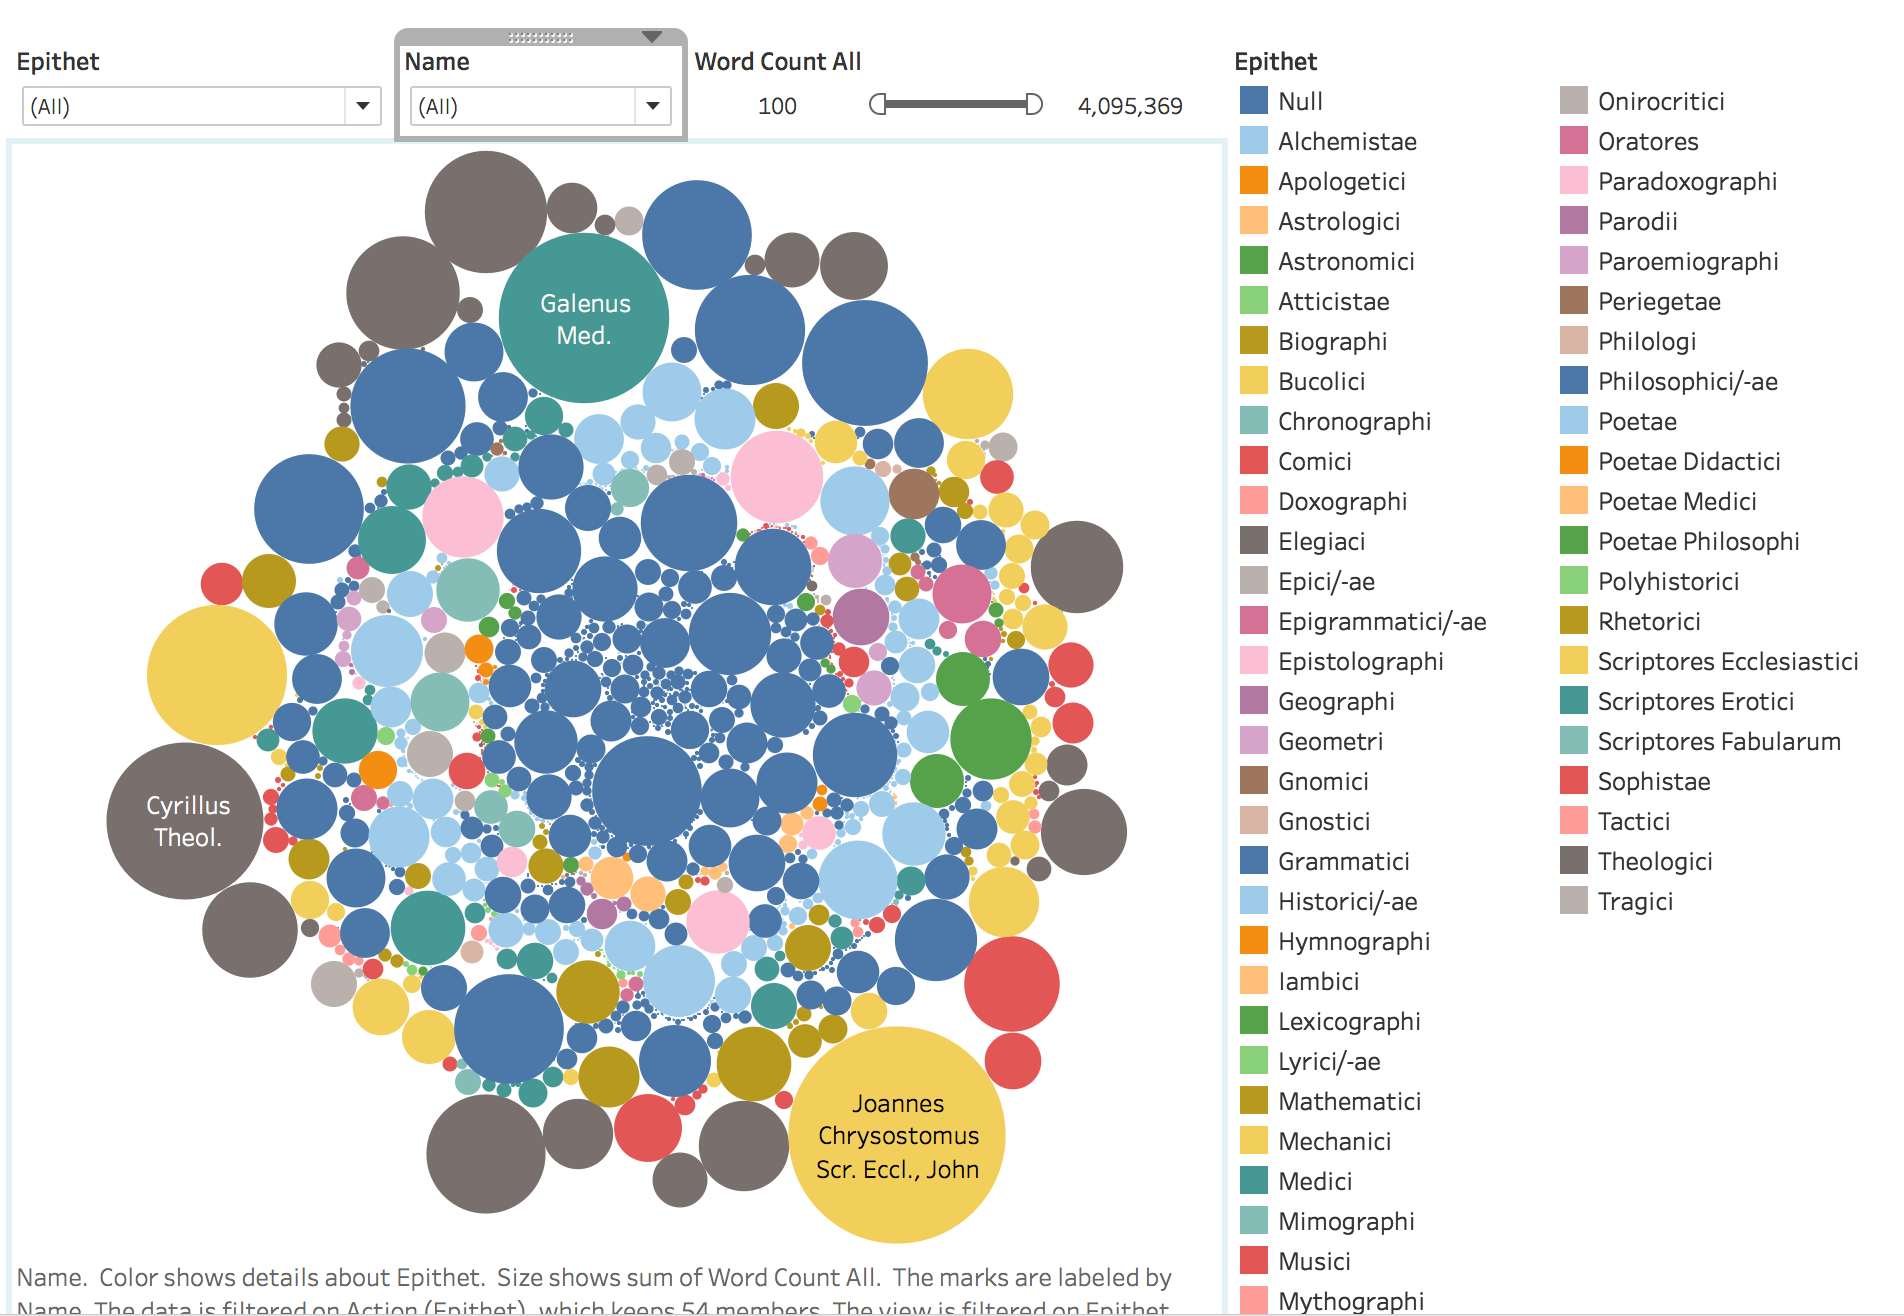

In [47]:
# Let's visualize the Greek (TLG) Canon

from IPython.display import Image
Image('images/tableau_bubble.png')

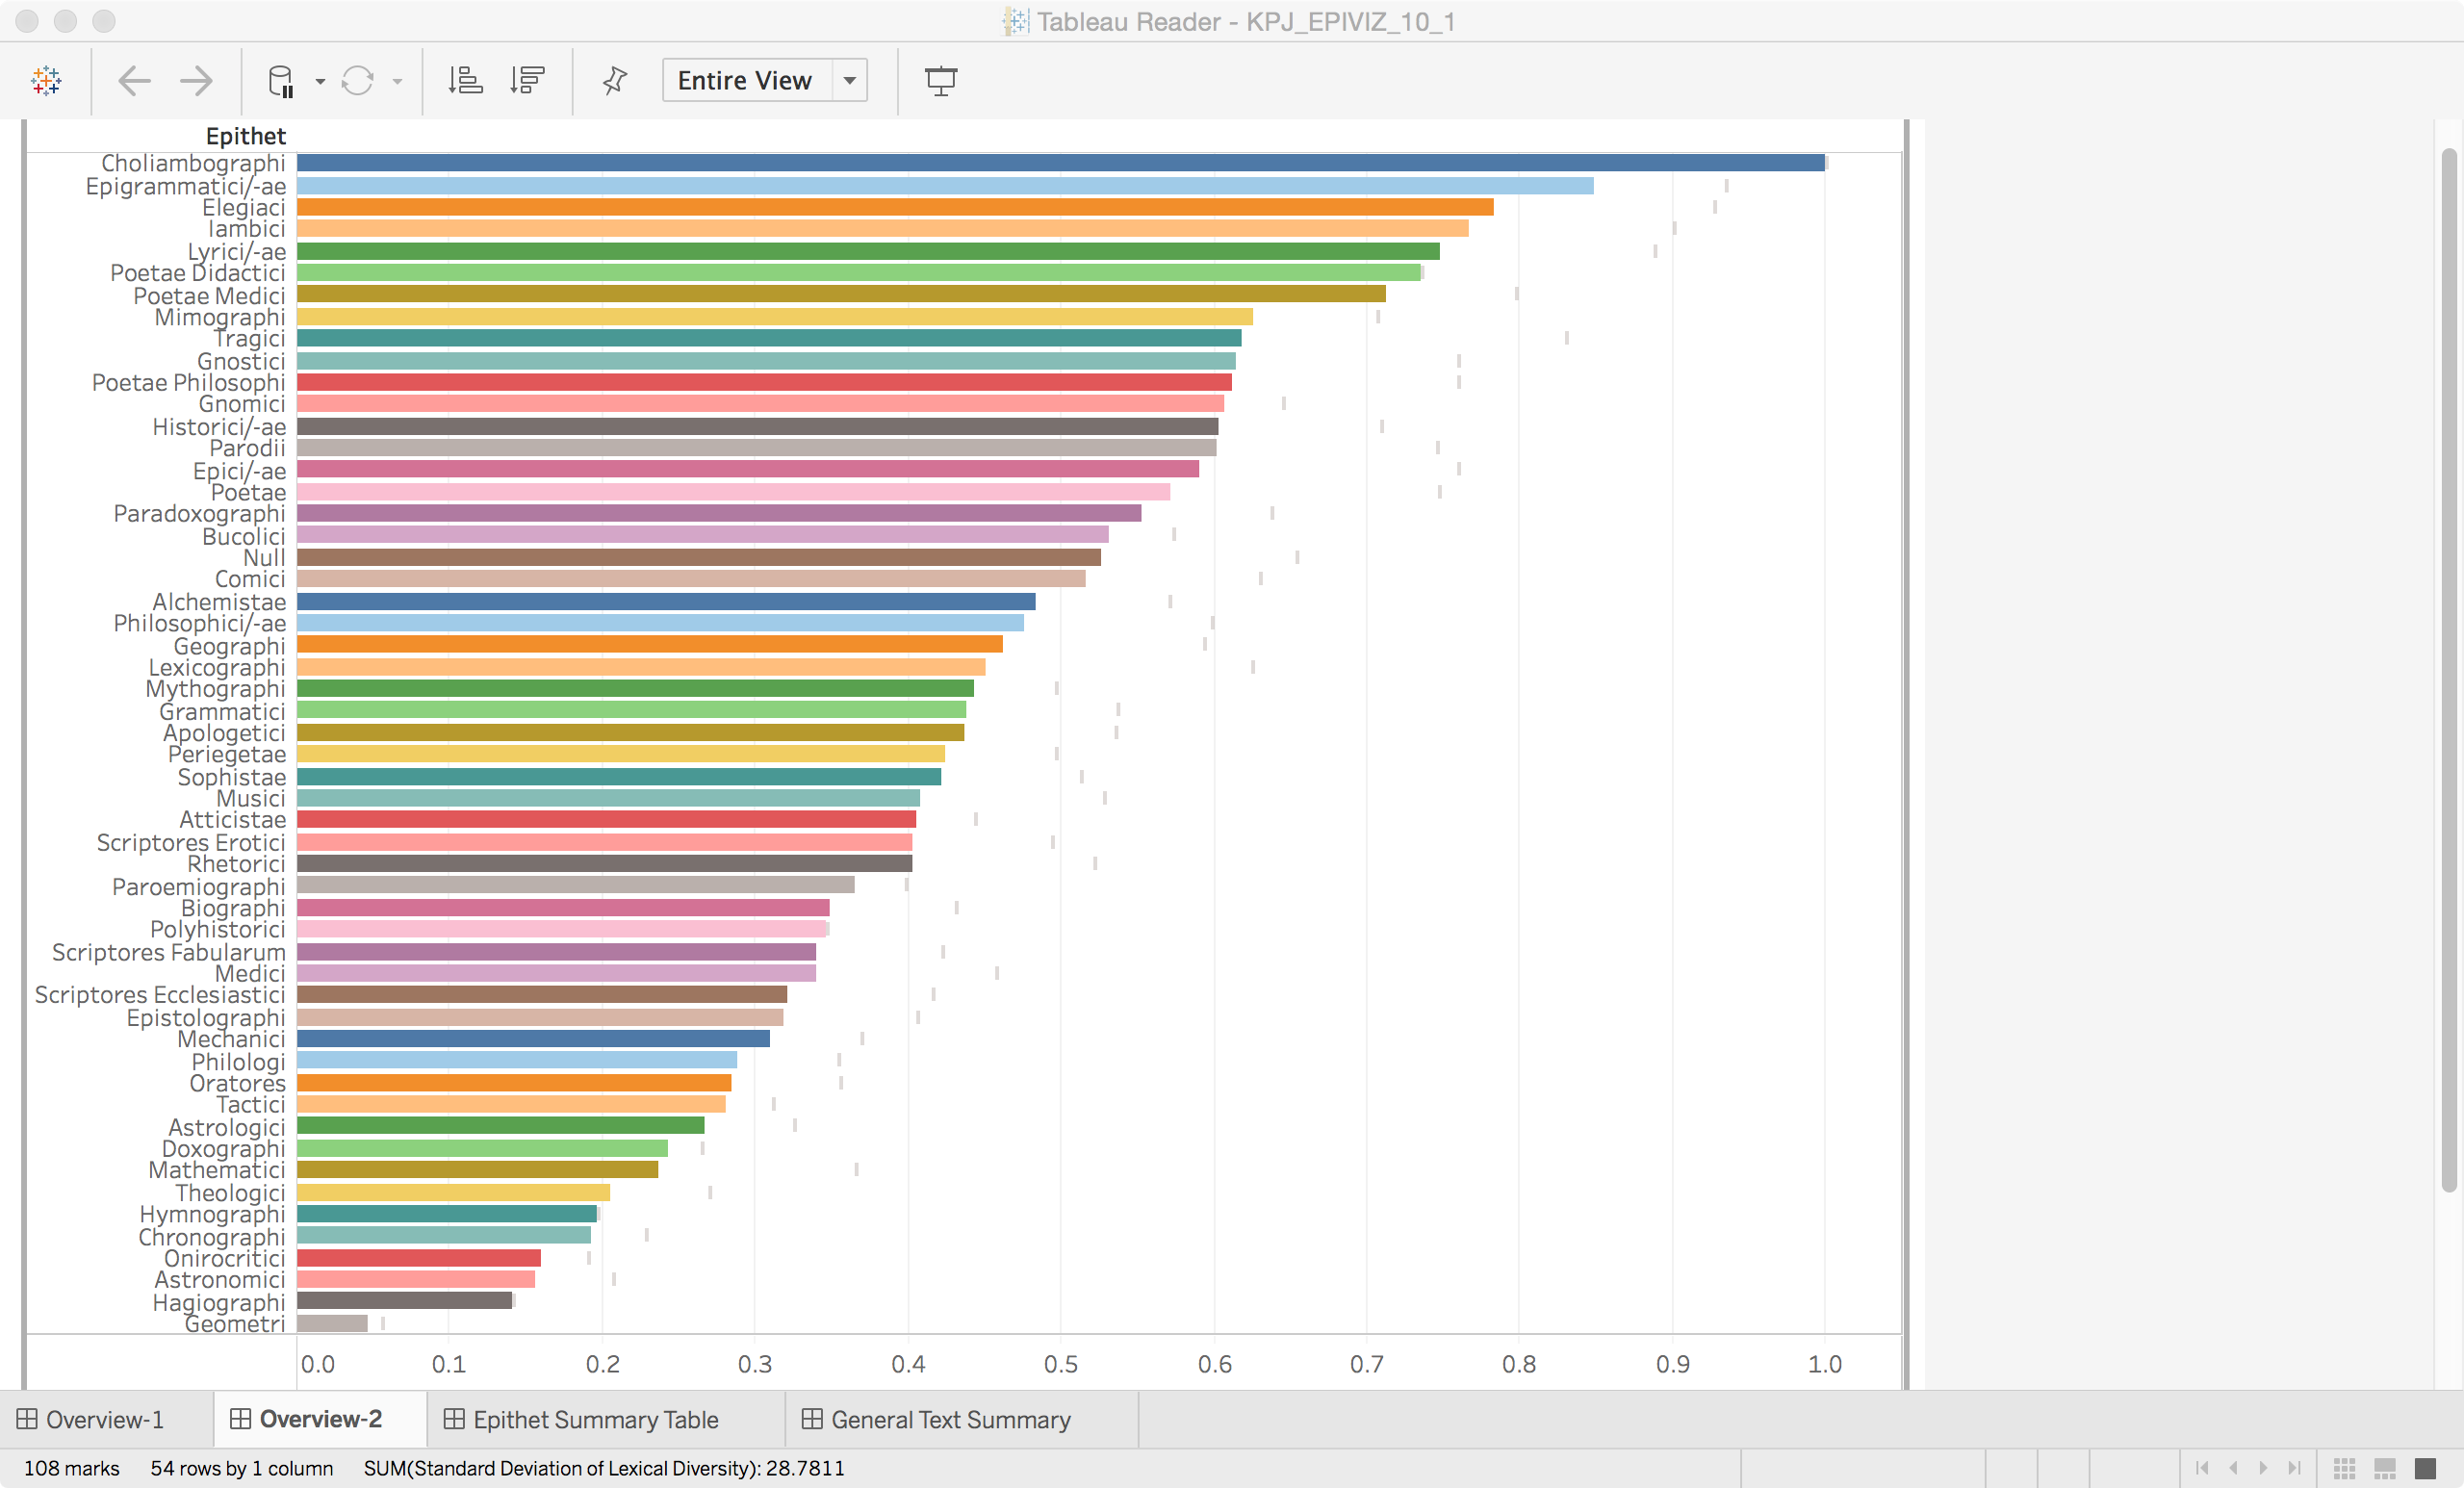

In [48]:
Image('images/lexical_diversity_greek_canon.png')

# Stopword filtering

We have stopword lists for many languages.

In [49]:
# See http://docs.cltk.org/en/latest/latin.html#stopword-filtering

# The easiest way to do this in Python is to use a list comprehension to remove stopwords

from cltk.stop.latin import STOPS_LIST

print(STOPS_LIST)

['ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur', 'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam', 'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo', 'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum', 'ubi', 'uel', 'uero', 'unus', 'ut']


In [50]:
cato_no_stops = [w for w in cato_cltk_word_tokens_no_punt if not w in STOPS_LIST]
# observe no stopwords
#! consider others you might want to add to the Latin stops list
print(cato_no_stops)

['interdum', 'praestare', 'mercaturis', 'rem', 'quaerere', 'periculosum', 'sit', 'item', 'foenerari', 'honestum', 'maiores', 'nostri', 'habuerunt', 'legibus', 'posiverunt', 'furem', 'dupli', 'condemnari', 'foeneratorem', 'quadrupli', 'quanto', 'peiorem', 'civem', 'existimarint', 'foeneratorem', 'furem', 'hinc', 'licet', 'existimare', 'virum', 'bonum', 'quom', 'laudabant', 'laudabant', 'bonum', 'agricolam', 'bonum', '-que', 'colonum', 'amplissime', 'laudari', 'existimabatur', 'laudabatur', 'mercatorem', 'strenuum', 'studiosum', '-que', 'rei', 'quaerendae', 'existimo', 'verum', 'supra', 'dixi', 'periculosum', 'calamitosum', 'agricolis', 'viri', 'fortissimi', 'milites', 'strenuissimi', 'gignuntur', 'maxime', '-que', 'pius', 'quaestus', 'stabilissimus', '-que', 'consequitur', 'minime', '-que', 'invidiosus', 'minime', '-que', 'male', 'cogitantes', 'sunt', 'eo', 'studio', 'occupati', 'sunt', 'nunc', 'rem', 'redeam', 'quod', 'promisi', 'institutum', 'principium', 'hoc', 'erit']


In [51]:
from cltk.stop.greek.stops import STOPS_LIST
print(STOPS_LIST)

['αὐτὸς', 'αὐτός', 'γε', 'γὰρ', 'γάρ', "δ'", 'δαὶ', 'δαὶς', 'δαί', 'δαίς', 'διὰ', 'διά', 'δὲ', 'δέ', 'δὴ', 'δή', 'εἰ', 'εἰμὶ', 'εἰμί', 'εἰς', 'εἴμι', 'κατὰ', 'κατά', 'καὶ', 'καί', 'μετὰ', 'μετά', 'μὲν', 'μέν', 'μὴ', 'μή', 'οἱ', 'οὐ', 'οὐδεὶς', 'οὐδείς', 'οὐδὲ', 'οὐδέ', 'οὐκ', 'οὔτε', 'οὕτως', 'οὖν', 'οὗτος', 'παρὰ', 'παρά', 'περὶ', 'περί', 'πρὸς', 'πρός', 'σὸς', 'σός', 'σὺ', 'σὺν', 'σύ', 'σύν', 'τε', 'τι', 'τις', 'τοιοῦτος', 'τοὶ', 'τοί', 'τοὺς', 'τούς', 'τοῦ', 'τὰ', 'τά', 'τὴν', 'τήν', 'τὶ', 'τὶς', 'τί', 'τίς', 'τὸ', 'τὸν', 'τό', 'τόν', 'τῆς', 'τῇ', 'τῶν', 'τῷ', "ἀλλ'", 'ἀλλὰ', 'ἀλλά', 'ἀπὸ', 'ἀπό', 'ἂν', 'ἄλλος', 'ἄν', 'ἄρα', 'ἐγὼ', 'ἐγώ', 'ἐκ', 'ἐξ', 'ἐμὸς', 'ἐμός', 'ἐν', 'ἐπὶ', 'ἐπί', 'ἐὰν', 'ἐάν', 'ἑαυτοῦ', 'ἔτι', 'ἡ', 'ἢ', 'ἤ', 'ὁ', 'ὃδε', 'ὃς', 'ὅδε', 'ὅς', 'ὅστις', 'ὅτι', 'ὑμὸς', 'ὑμός', 'ὑπὲρ', 'ὑπέρ', 'ὑπὸ', 'ὑπό', 'ὡς', 'ὥστε', 'ὦ', 'ξύν', 'ξὺν', 'σύν', 'σὺν', 'τοῖς', 'τᾶς']


In [52]:
athenaeus_no_stops = [w for w in athenaeus_word_tokens_no_punt_lowered if not w in STOPS_LIST]
print(athenaeus_no_stops)

['ἀθήναιος', 'βίβλου', 'πατήρ·', 'ποιεῖται', 'λόγον', 'τιμοκράτην·', 'δειπνοσοφιστὴς', 'ταύτῃ', 'ὄνομα', 'ὑπόκειται', 'λόγῳ', 'λαρήνσιος', 'ῥωμαῖος', 'ἀνὴρ', 'τύχῃ', 'περιφανής', 'πᾶσαν', 'παιδείαν', 'ἐμπειροτάτους', 'αὑτοῦ', 'δαιτυμόνας', 'ποιούμενος·', 'οἷς', 'ἔσθ᾽', 'οὗτινος', 'καλλίστων', 'ἐμνημόνευσεν', 'ἰχθῦς', 'βίβλῳ', 'ἐνέθετο', 'τὰς', 'τούτων', 'χρείας', 'τὰς', 'ὀνομάτων', 'ἀναπτύξεις', 'λαχάνων', 'γένη', 'παντοῖα', 'ζῴων', 'παντοδαπῶν', 'ἄνδρας', 'ἱστορίας', 'συγγεγραφότας', 'ποιητὰς', 'φιλοσόφους', 'ὄργανα', 'μουσικὰ', 'σκωμμάτων', 'εἴδη', 'μυρία', 'ἐκπωμάτων', 'διαφορὰς', 'πλούτους', 'βασιλέων', 'διηγήσατο', 'νηῶν', 'μεγέθη', 'ὅσα', 'ἄλλα', 'οὐδ᾽', 'εὐχερῶς', 'ἀπομνημονεύσαιμι', 'ἐπιλίποι', 'μ᾽', 'ἡμέρα', 'κατ᾽', 'εἶδος', 'διεξερχόμενον', 'καί', 'ἐστιν', 'λόγου', 'οἰκονομία', 'μίμημα', 'δείπνου', 'πολυτελείας', 'βίβλου', 'διασκευὴ', 'δείπνῳ', 'παρασκευῆς', 'τοιοῦτον', 'θαυμαστὸς', 'λόγου', 'οἰκονόμος', 'ἀθήναιος', 'ἥδιστον', 'λογόδειπνον', 'εἰσηγεῖται', 'κρείττων', 'γινόμεν

In [53]:
print(len(athenaeus_word_tokens_no_punt_unique))

121


In [54]:
print(len(athenaeus_no_stops))

99
